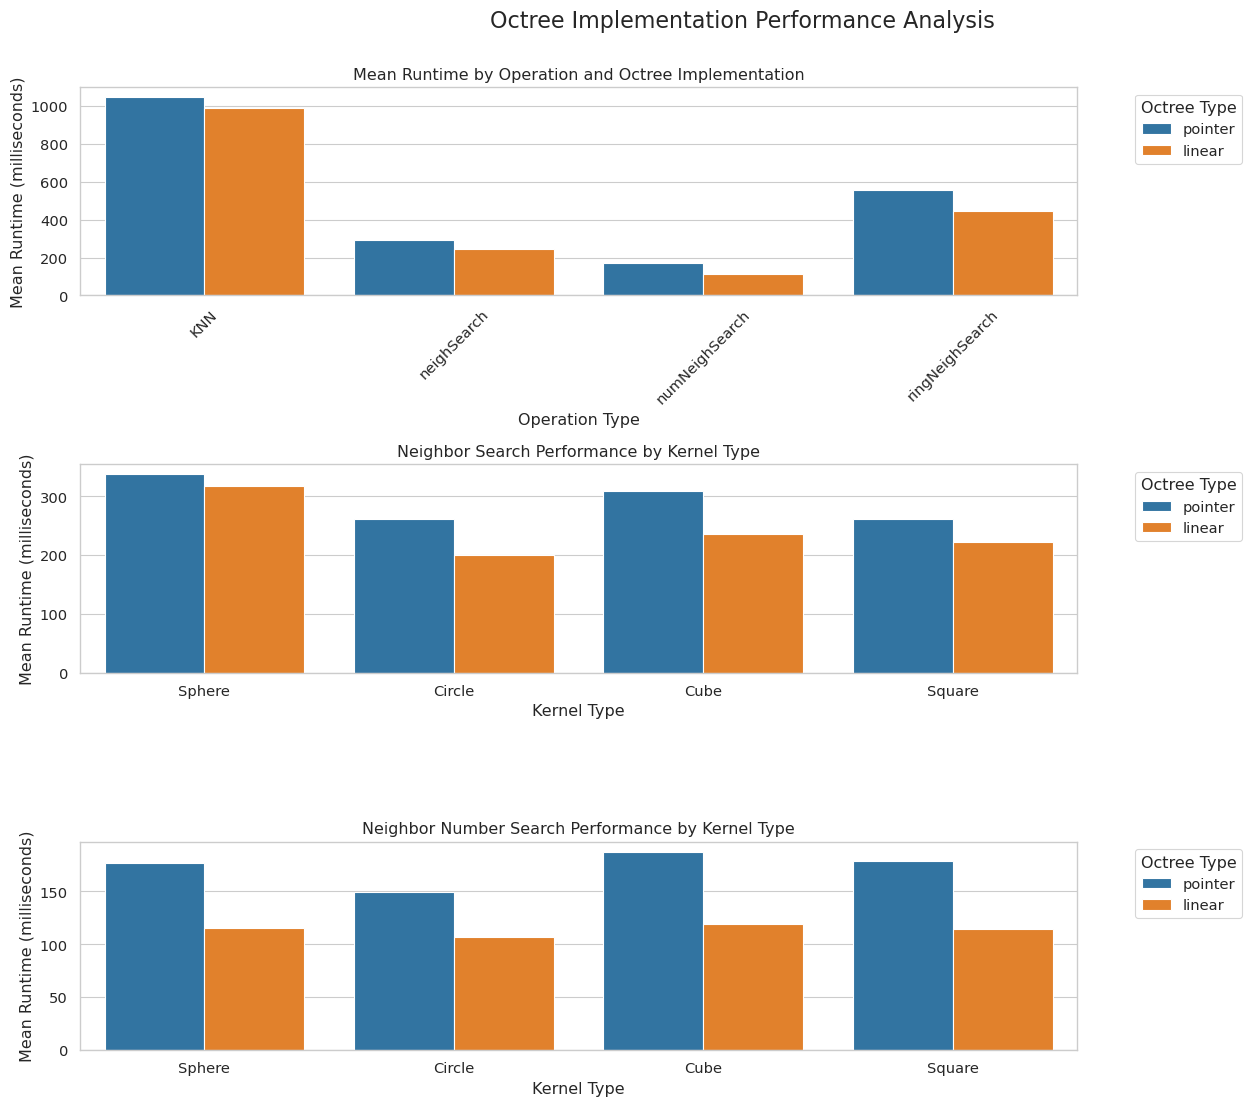

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
DATA_FILE = 'benchmark_results.csv'
df = pd.read_csv(DATA_FILE)

# Convert times to milliseconds
df['mean'] = df['mean'] * 1000

# Set the style
plt.style.use('default')
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.2)

# Define a consistent color palette for 'octree' categories
octree_types = df['octree'].unique()
palette = sns.color_palette("tab10", len(octree_types))
color_dict = dict(zip(octree_types, palette))

# Create figure with multiple subplots
fig = plt.figure(figsize=(15, 12))
fig.suptitle('Octree Implementation Performance Analysis', fontsize=16, y=0.95)

# 1. Mean runtimes comparison for all algorithms
plt.subplot(3, 1, 1)
mean_times = df.pivot_table(
    values='mean',
    index='octree',
    columns='operation',
    aggfunc='mean'
).reset_index()

mean_times_melted = pd.melt(
    mean_times,
    id_vars=['octree'],
    var_name='operation',
    value_name='mean_time'
)

sns.barplot(
    data=mean_times_melted,
    x='operation',
    y='mean_time',
    hue='octree',
    hue_order=octree_types,  # Ensures consistent order
    palette=color_dict,  # Use consistent colors
    width=0.8
)

plt.title('Mean Runtime by Operation and Octree Implementation')
plt.xlabel('Operation Type')
plt.ylabel('Mean Runtime (milliseconds)')
plt.xticks(rotation=45)
plt.legend(title='Octree Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# 2. Neighbor search comparison with different kernels
plt.subplot(3, 1, 2)
neigh_search_df = df[df['operation'] == 'neighSearch']

sns.barplot(
    data=neigh_search_df,
    x='kernel',
    y='mean',
    hue='octree',
    hue_order=octree_types,  # Ensures consistent order
    palette=color_dict,  # Use consistent colors
    width=0.8
)

plt.title('Neighbor Search Performance by Kernel Type')
plt.xlabel('Kernel Type')
plt.ylabel('Mean Runtime (milliseconds)')
plt.legend(title='Octree Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# 3. Neighbor num search comparison with different kernels
plt.subplot(3, 1, 3)
num_neigh_search_df = df[df['operation'] == 'numNeighSearch']

sns.barplot(
    data=num_neigh_search_df,
    x='kernel',
    y='mean',
    hue='octree',
    hue_order=octree_types,  # Ensures consistent order
    palette=color_dict,  # Use consistent colors
    width=0.8
)

plt.title('Neighbor Number Search Performance by Kernel Type')
plt.xlabel('Kernel Type')
plt.ylabel('Mean Runtime (milliseconds)')
plt.legend(title='Octree Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 0.85, 0.95])
plt.show()
